# Image Super Resolution


---

- Image Super Resolution 은 저해상도의 이미지를 고해상도의 이미지로 출력하는 모델입니다.
- RRDN, RDN 2가지 모델을 사용하여 그 결과를 비교하였습니다
- 결론적으로 RRDN이 더 자연스러운 고해상도 이미지를 반환하여 RRDN으로 예측한 고해상도 이미지를 사용하게 되었습니다.
- ISR 출처 : https://github.com/idealo/image-super-resolution




## Setup
패키지를 설치하고 샘플 weights, 샘플 이미지 및 샘플 구성 파일을 다운로드합니다.



In [ ]:
# ISR을 설치합니다.
!pip install ISR

     |████████████████████████████████| 86.3 MB 42 kB/s 
     |████████████████████████████████| 3.8 MB 52.9 MB/s 
     |████████████████████████████████| 449 kB 62.0 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2c0357629e7b0d335179c7cea175e02d67f3a0a645147c40fb50d11ede3c38ae
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

# Prediction

In [ ]:
!pip install ISR -y


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [ ]:
!wget http://images.math.cnrs.fr/IMG/png/section8-image.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

--2022-01-15 05:47:41--  http://images.math.cnrs.fr/IMG/png/section8-image.png
Resolving images.math.cnrs.fr (images.math.cnrs.fr)... 134.206.83.12
Connecting to images.math.cnrs.fr (images.math.cnrs.fr)|134.206.83.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114590 (112K) [image/png]
Saving to: ‘section8-image.png’

section8-image.png  100%[===================>] 111.90K   350KB/s    in 0.3s    

2022-01-15 05:47:42 (350 KB/s) - ‘section8-image.png’ saved [114590/114590]



In [ ]:
# 필요한 라이브러리를 가져옵니다.
import numpy as np
from PIL import Image

# 이미지를 open 합니다.
img = Image.open('/content/f-b1.jpg')
img

# Get predictions


---


## Create the model and run prediction
Create a RRDN or RDN model with the provided pre-trained weights, choose one

In [ ]:
# h5py 를 2.10.0 버전으로 재설치합니다.(필수)
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 15.7 MB 40.9 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which 

# 1. RRDN Model


---



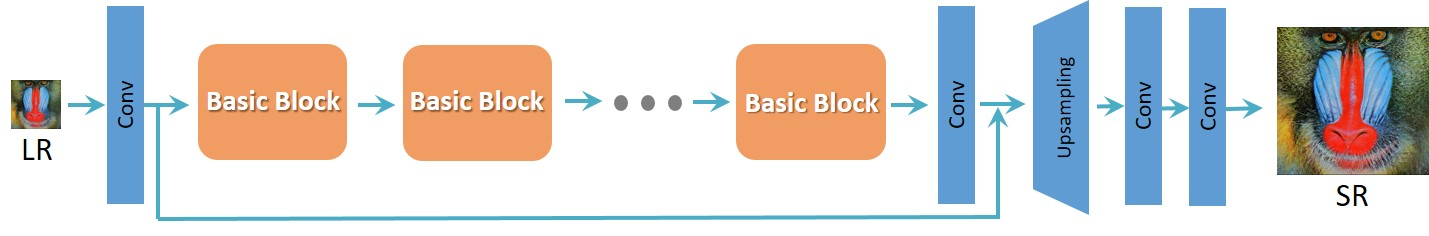
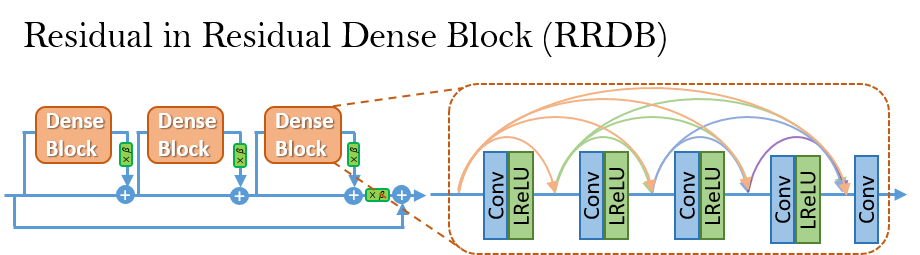

## RRDN Network architecture
The main parameters of the architecture structure of RRDN are:

- T - number of Residual in Residual Dense Blocks (RRDB)
- D - number of Residual Dense Blocks (RDB) insider each RRDB
- C - number of convolutional layers stacked inside a RDB
- G - number of feature maps of each convolutional layers inside the RDBs
- G0 - number of feature maps for convolutions outside of RDBs and of each RBD output

In [ ]:
# RDN, RRDN 모델을 가져옵니다.
from ISR.models import RDN, RRDN

# Weights 가 gans 인 RRDN 모델을 사용합니다.
model = RRDN(weights='gans')

17465344/17462488 [==============================] - 2s 0us/step


# Baseline

In [ ]:
# 이미지 사이즈를 조정합니다.
img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

# Prediction

In [ ]:
# RRDN 모델로 예측한 고해상도 이미지 결과를 출력합니다.
sr_img = model.predict(np.array(img))
Image.fromarray(sr_img)

## Usecase: upscaling noisy images

In [ ]:
# 압축 artefact를 도입하고 일부 정보를 손실하려면 이미지를 JPEG 형식으로 압축합니다.
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

# 2. RDN Model


---



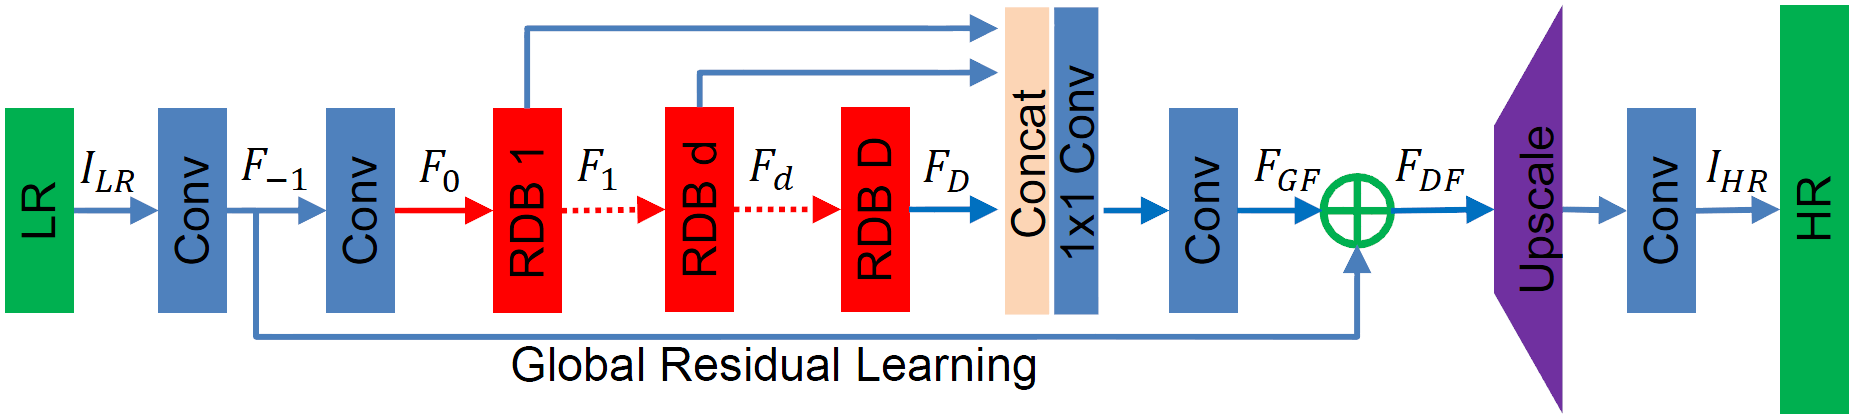
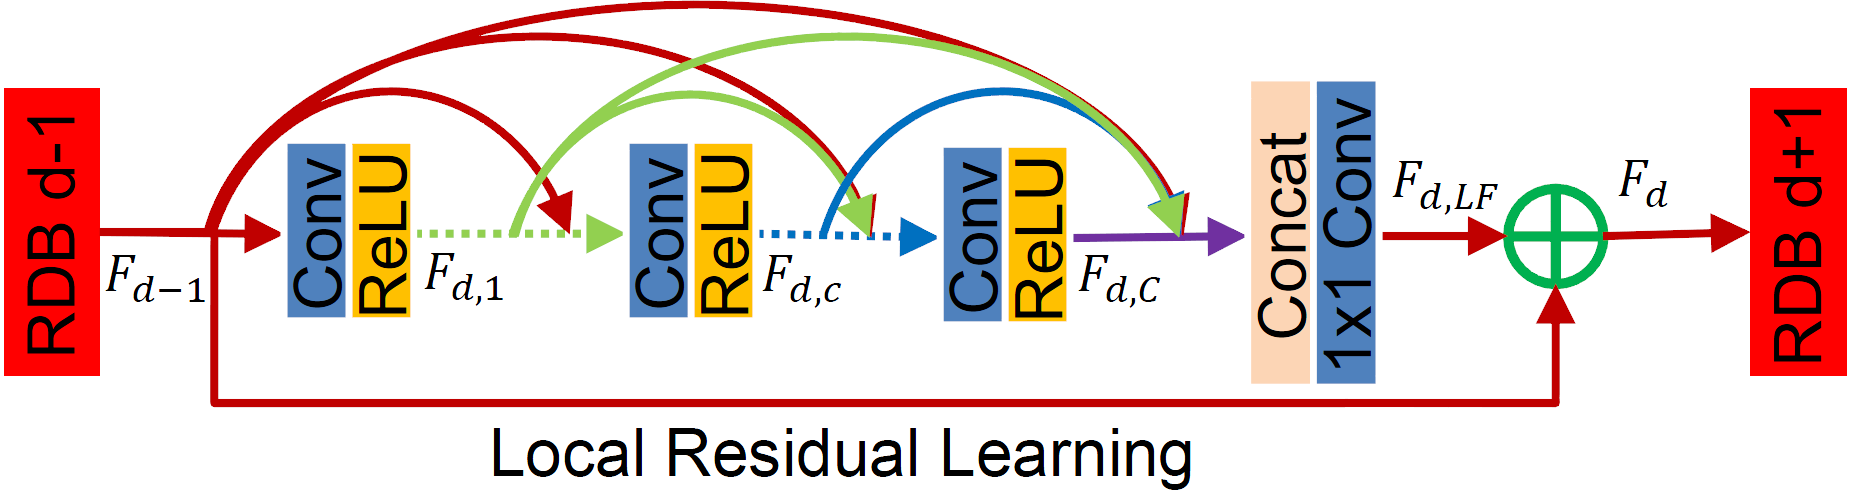

## RDN Network architecture
The main parameters of the architecture structure of RDN are:

- D - number of Residual Dense Blocks (RDB)
- C - number of convolutional layers stacked inside a RDB
- G - number of feature maps of each convolutional layers inside the RDBs
- G0 - number of feature maps for convolutions outside of RDBs and of each RBD output

# Baseline

In [ ]:
# 압축한 이미지의 사이즈를 재조정합니다.
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)

# Prediction

In [ ]:
# RDN 모델로 예측한 고해상도 이미지를 출력합니다.
model = RDN(weights='noise-cancel')
sr_img = model.predict(np.array(compressed_img))
Image.fromarray(sr_img)